In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import torch
from torch.nn import Module
from Enums import ModelMethod, ModelName
from omegaconf import OmegaConf, DictConfig, ListConfig
from typing import List, Union

import FeatureMapsExtractor as fme
import importlib
importlib.reload(fme)

<module 'FeatureMapsExtractor' from '/mnt/Development-Main/Vos/S2_Porjects/UnderstandingYou/FeatureMapsExtractor.py'>

In [5]:

config: Union[DictConfig, ListConfig] = OmegaConf.load("params.yaml")
res_net_local: Module = fme.loadModelFromPath(modelMethod=ModelMethod.RESNET, 
                                              path=config.fme.resnet_baseline_path_best)

In [95]:
vgg_net_pretrained: Module = fme.loadPretrained(modelMethod=ModelMethod.VGG,
                                                   path=config.fme.pretrained_vgg_path_best)
alex_net_pretrained: Module = fme.loadPretrained(modelMethod=ModelMethod.ALEXNET,
                                                    path=config.fme.pretrained_alex_path_best)
res_net_pretrained: Module = fme.loadPretrained(modelMethod=ModelMethod.RESNET,
                                                   path=config.fme.pretrained_resnet_path_best)

vgg_net_local: Module = fme.loadModelFromPath(modelMethod=ModelMethod.VGG,
                                              path=config.fme.vgg_baseline_path_best)
alex_net_local: Module = fme.loadModelFromPath(modelMethod=ModelMethod.ALEXNET,
                                               path=config.fme.alexnet_baseline_path_best)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/mnt/Development-Main/ngoding-env/anaconda3/envs/AIS_MDS/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18812/540985528.py", line 9, in <module>
    res_net_local: Module = fme.loadModelFromPath(modelMethod=ModelMethod.RESNET,
  File "/mnt/Development-Main/Vos/S2_Porjects/UnderstandingYou/FeatureMapsExtractor.py", line 71, in loadModelFromPath
    model = BaselineResnet(ResidualBlock, numClasses=NUM_CLASSES)
  File "/mnt/Development-Main/Vos/S2_Porjects/UnderstandingYou/Baseline_Resnet.py", line 45, in __init__
TypeError: super(type, obj): obj must be an instance or subtype of type

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/mnt/Development-Main/ngoding-env/anaconda3/envs/AIS_MDS/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2120, in showt

In [6]:
res_net_pretrained.train()

NameError: name 'res_net_pretrained' is not defined

In [93]:
res_net_local.train()

BaselineResnet(
  (conv_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (max_pool_1): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer_1): Sequential(
    (0): ResidualBlock(
      (conv1): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (conv2): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (downsample): Sequential(
        (0): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (

Total Conv Layer:  33


ValueError: num must be an integer with 1 <= num <= 20, not 21

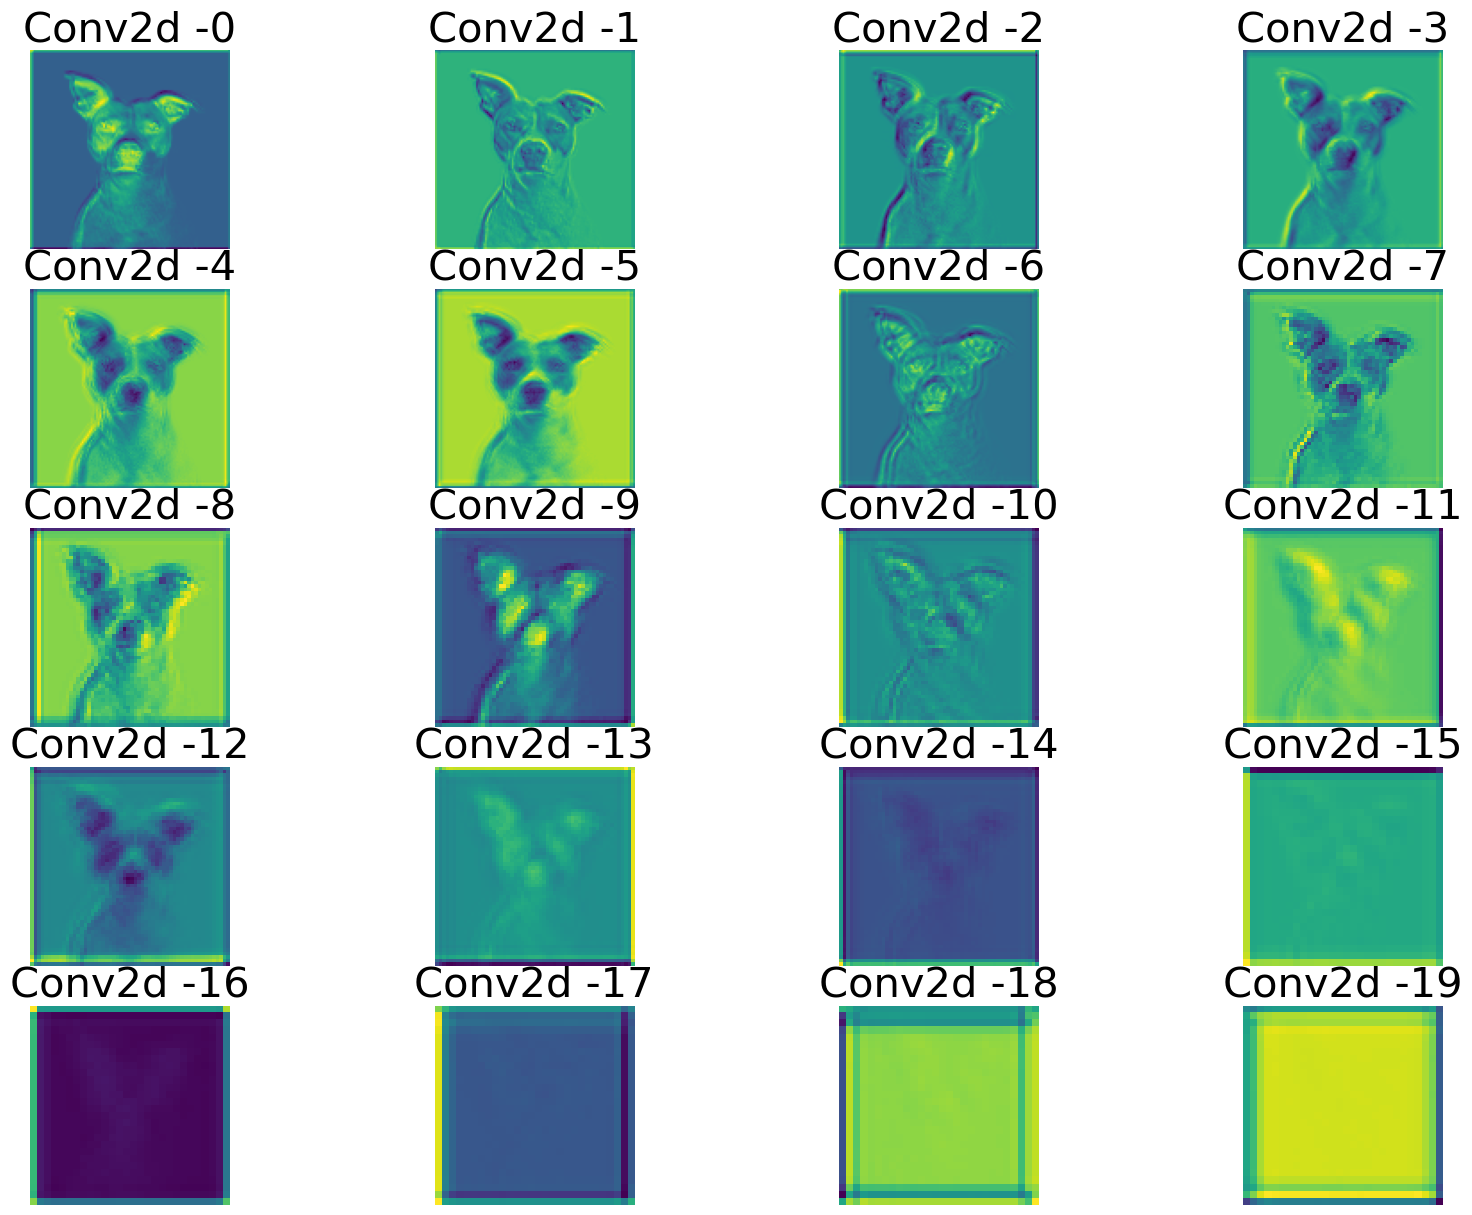

In [8]:
importlib.reload(fme)
fme.extractResultFeaturemaps(res_net_local)

In [92]:
fme.extractResultFeaturemaps(res_net_pretrained)

Total Conv Layer:  20


RuntimeError: Given groups=1, weight of size [128, 64, 1, 1], expected input[1, 128, 56, 56] to have 64 channels, but got 128 channels instead

Total Conv Layer:  6
[Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1)), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))]


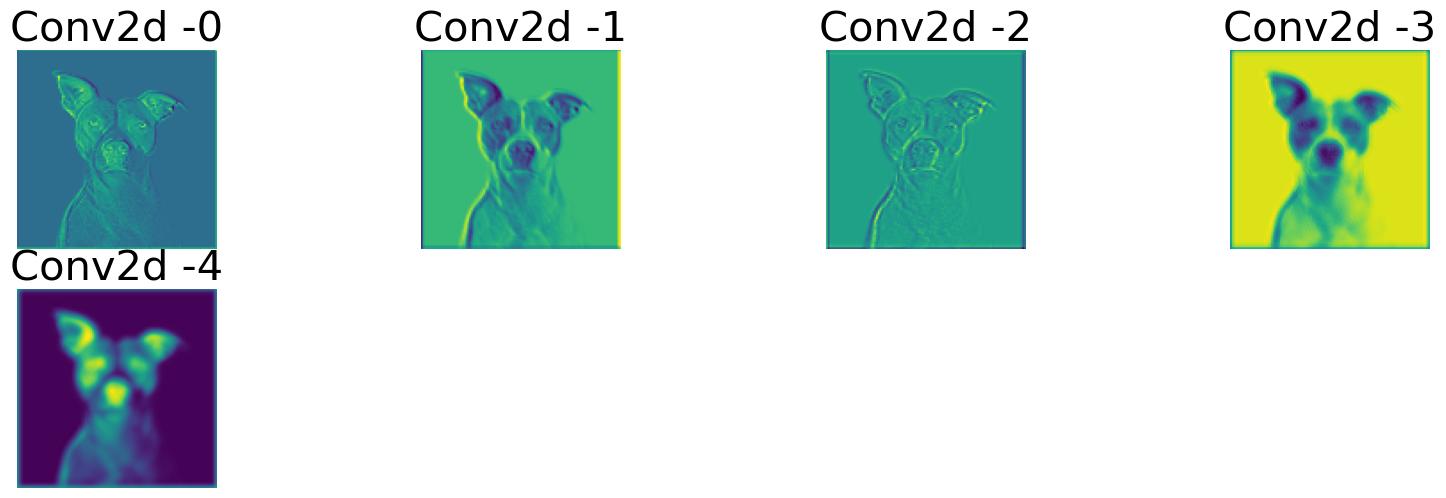

In [30]:
fme.extractResultFeaturemaps(alex_net_local)